<a href="https://colab.research.google.com/github/alevchencko/-2-8-/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_2_(%D1%87%D0%BC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install numdifftools


In [7]:
import numpy as np

# Визначення функції
def f(x):
    return x**4 - 108*x + 7

# Відокремлення коренів
def find_segments():  # відокремлюємо корені
    search_range = np.arange(-10, 10, 1)
    a = None
    previous_x = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        if previous_x is not None and previous_x * current_x < 0:
            segments.append((a, x))
        a = x
        previous_x = current_x

    return segments

# Виклик функції для відокремлення коренів
segments = find_segments()
for a, b in segments:
    print(f'Found segment: [{a}, {b}]')


Found segment: [0, 1]
Found segment: [4, 5]


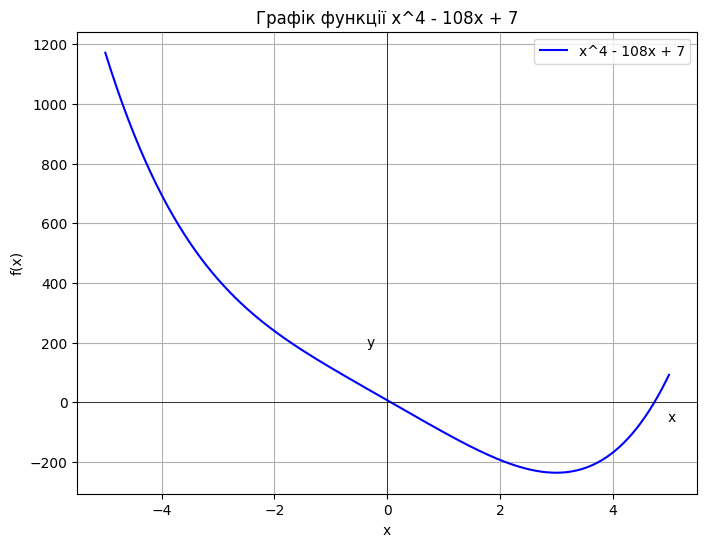

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Визначення функції
def f(x):
    return x**4 - 108*x + 7

# Побудова графіка функції
def plot_function():
    x = np.linspace(-5, 5, 400)
    y = f(x)

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='x^4 - 108x + 7', color='blue')
    plt.title('Графік функції x^4 - 108x + 7')
    plt.xlabel('x')
    plt.ylabel('f(x)')

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.text(5.05, -50, 'x', ha='center', va='center')
    plt.text(-0.3, 200, 'y', ha='center', va='center')

    plt.grid(True)
    plt.legend()
    plt.show()

# Виклик функції для побудови графіка
plot_function()


In [9]:
import numpy as np
import numdifftools as nd

# Визначення функції
def f(x):
    return x**4 - 108*x + 7

# Метод половинного ділення (бісекції)
def rec(a, b, eps):
    while abs(a - b) > eps:
        if f(a) * f((a + b) / 2) < 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
        x = (a + b) / 2
    print('x= ', round(x, 5), '  -   Half division method')

# Метод хорд (секант)
def hord(a, b, eps):
    derivative_f = nd.Derivative(f, n=1)
    if f(a) * derivative_f(a) > 0:
        x0 = a
        xi = b
    else:
        x0 = b
        xi = a
    xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    while abs(xi_1 - xi) > eps:
        xi = xi_1
        xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    print('x= ', round(xi_1, 5), '  -   Chord method')

# Виклик методів для кожного інтервалу, знайденого в першому коді
if __name__ == "__main__":
    # Визначення інтервалів (замінити на знайдені сегменти)
    segments = [(0, 1), (4, 5)]

    eps = 0.001

    # Знаходження коренів на відокремлених інтервалах
    for a, b in segments:
        print(f"\nРозв'язки на відрізку [{a}, {b}]")
        rec(a, b, eps)
        hord(a, b, eps)



Розв'язки на відрізку [0, 1]
x=  0.06494   -   Half division method
x=  0.06481   -   Chord method

Розв'язки на відрізку [4, 5]
x=  4.74072   -   Half division method
x=  4.7403   -   Chord method
